*REVISÃO ARVORE DE REGRESSÃO*

VOU UTILIZAR O DATASET IRIS 

contrução: 

1 - importar bibliotecas

2 - importar dataset

3 - tratar dados

4 - visualizar dados

5 - gerar insights desses dados

*------ fim da analise dos dados -----*

*----- começar a criar a arvore de regressão-----*

1 - certificar que está na formatação correta

2 - visualizar a correlação para escolher as melhores target

3 - separar target

4 - separar para treino e teste (train_test_split = 0.3)

5 - treinar duas arvores declarando a profundidade, para escolher a melhor

6 - calcular o MSE ( QUANTO MENOR, MELHOR)

7 - vizualizar a arvore com graphviz

8 - calcular ccp e vizualiza-lo

9 - usar cada valor obtido em um treinamento da arvore

10 - para cada arvore obtida, calcular MSE  

11 - montar gráfico MSE

12 - escolher melhor ponto de corte

13 - calcular o R

14 - vizualizar a arvore




In [88]:
# importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [89]:
# importando dataset iris

base = sns.load_dataset('iris')
base

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [90]:
# a ideia vai ser descobrir a espécie
base[['species']].value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [91]:
# vamos começar tratando os dados
#verificando valores ausentes
base.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [92]:
#verificando valores duplicados e apagando

base = base.drop_duplicates()

In [93]:
base.duplicated().sum()

0

In [94]:
base.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='species', ylabel='sepal_length'>

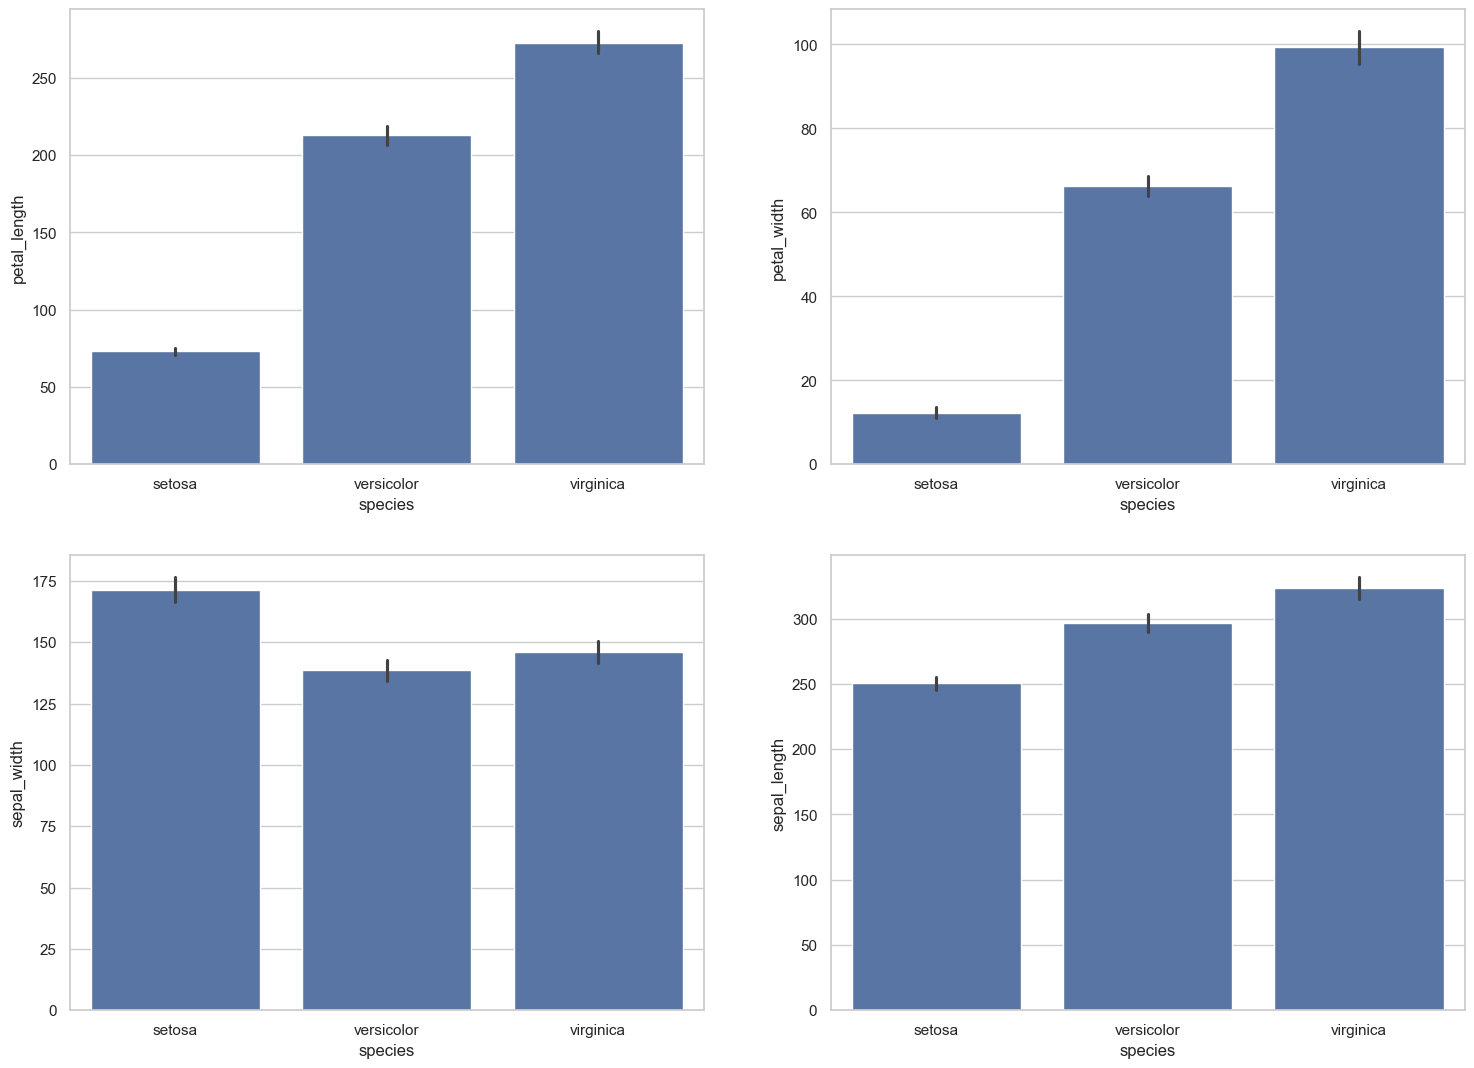

In [95]:
plt.rc('figure',figsize=(18,13))
fig,axes = plt.subplots(2,2)

sns.barplot(ax = axes[0, 0], x='species', y='petal_length', estimator=sum, data=base)
sns.barplot(ax = axes[0, 1], x='species', y='petal_width', estimator=sum, data=base)
sns.barplot(ax = axes[1, 0], x='species', y='sepal_width', estimator=sum, data=base)
sns.barplot(ax = axes[1, 1], x='species', y='sepal_length', estimator=sum, data=base,)



*noções sobre os 4 gráficos*

1 - a specie virginica possui possui as maiores petalas, tanto comprimento, quanto largura

2 - a specie setosa por sua vez tem as sepalas um poucos maiores do que as demais em questão de largura


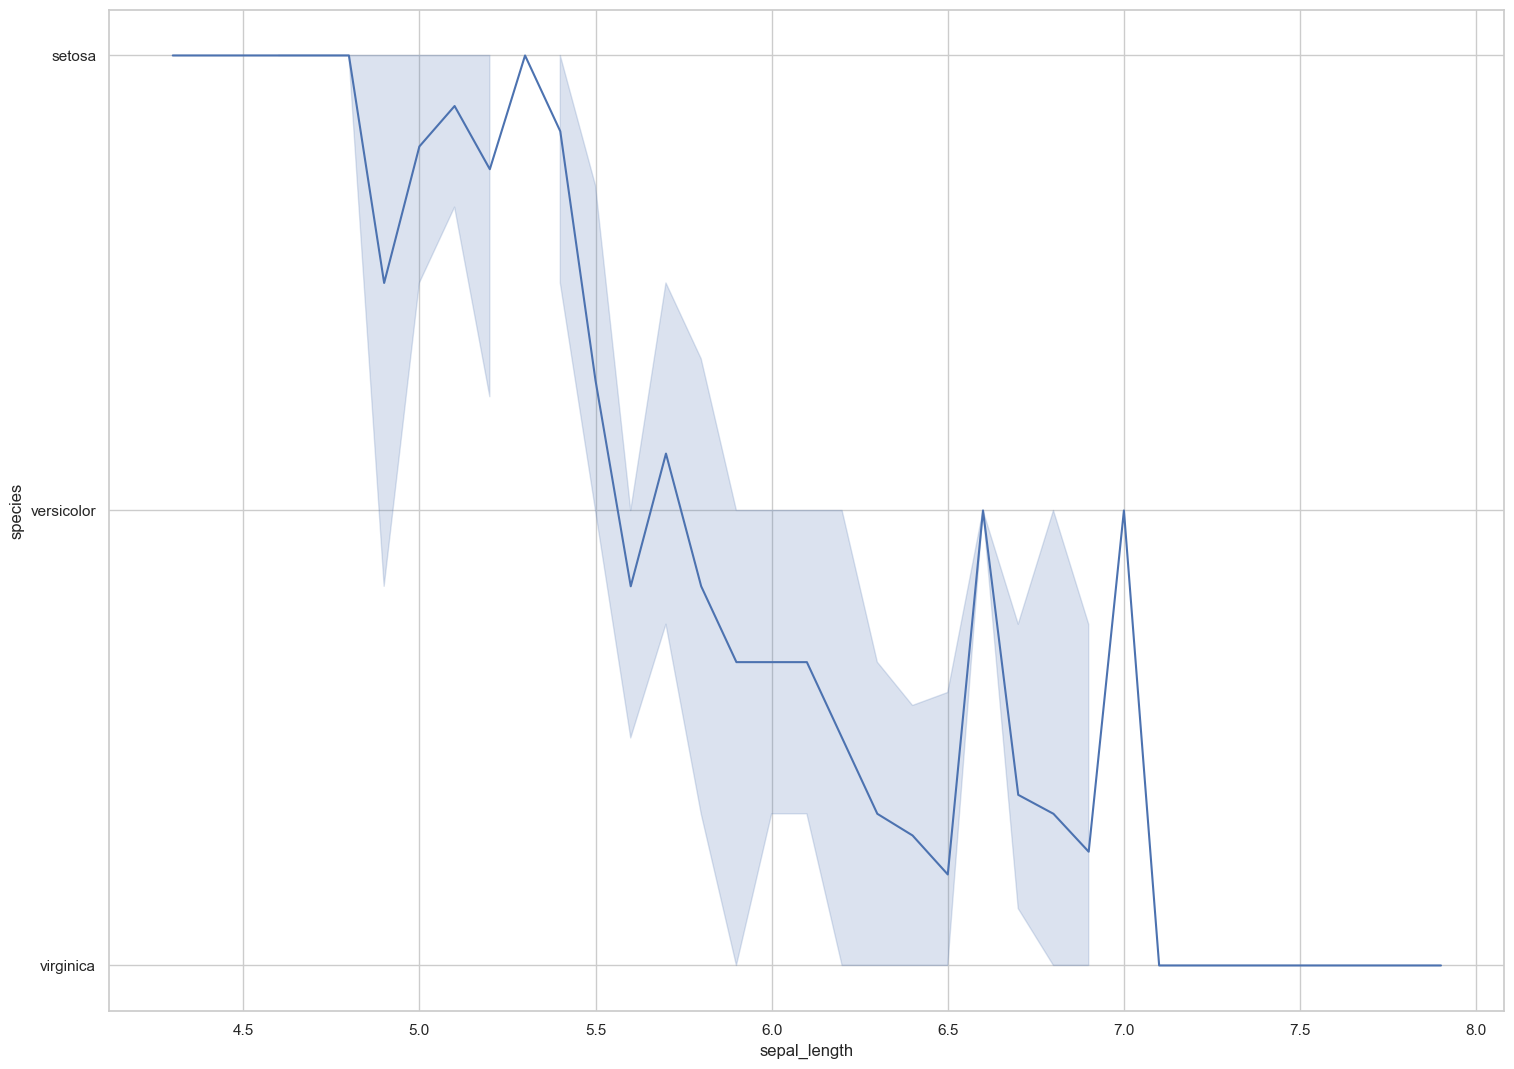

In [96]:
# vamos analisar só a specie virginica, já que se destacou mais.

sns.set(style="whitegrid") 
sns.lineplot(data=base, x="sepal_length", y="species")  
  
plt.show()
	


*nesse gráfico da para ter uma noção melhor sobre as diferenças de comprimento da sepala das species*

# com um breve entendimento dos gráficos, agora vamos para a construção da arvore

In [97]:
# certificando que os dados estão na formatação correta

base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [102]:
# vamos mapear a parte de species em 1,2,3
# 1 - virginica
# 2 - versicolor
# 3 - setosa

species_mapping = {'setosa': 1, 'virginica': 2, 'versicolor': 3}

# Aplicando o mapeamento ao DataFrame
base['specie_number'] = base['species'].map(species_mapping)


C:\Users\55819\AppData\Local\Temp\ipykernel_10556\297889069.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['specie_number'] = base['species'].map(species_mapping)


In [105]:
base = base.drop(columns = 'species_numerical')

In [106]:
base

,sepal_length,sepal_width,petal_length,petal_width,species,specie_number
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [108]:
base.drop(columns='species').corr()


,sepal_length,sepal_width,petal_length,petal_width,specie_number
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.460043
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.619780
petal_length,0.873738,-0.426028,1.000000,0.962772,0.650513
petal_width,0.820620,-0.362894,0.962772,1.000000,0.582041
specie_number,0.460043,-0.619780,0.650513,0.582041,1.000000


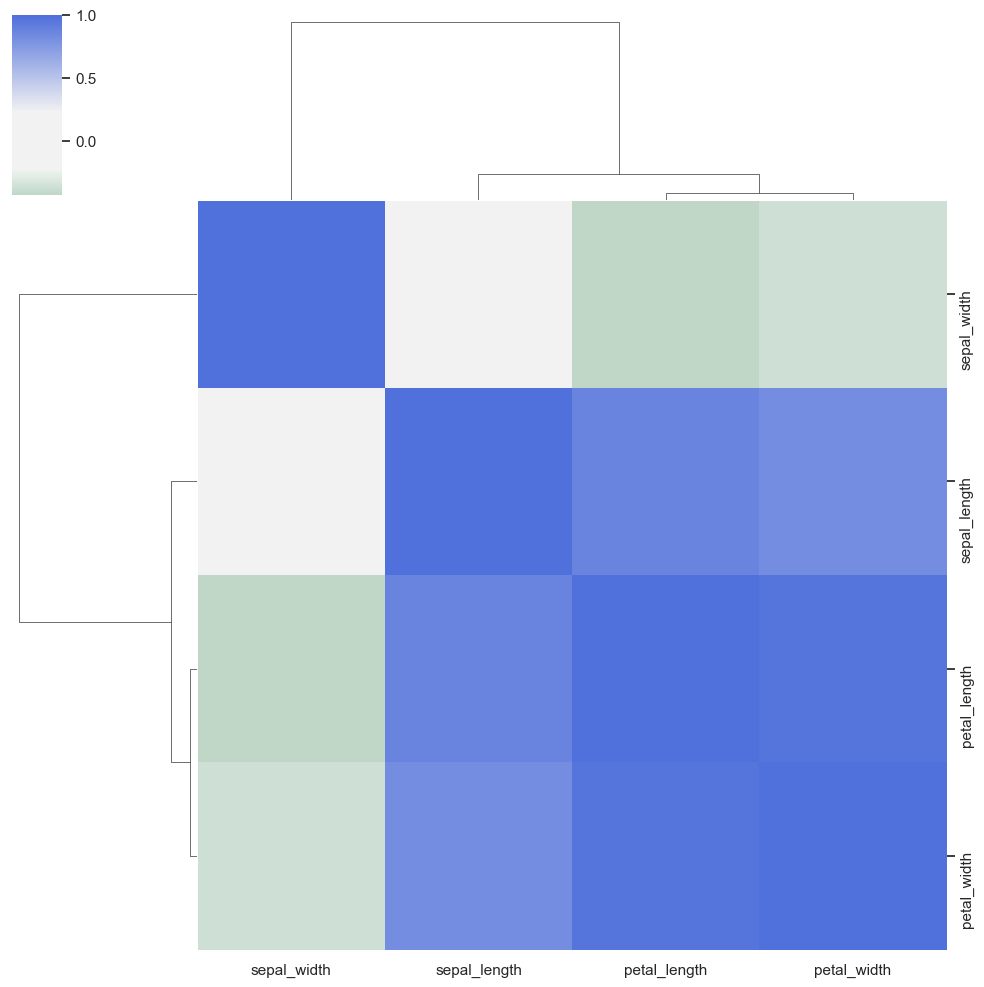

In [110]:
cmap = sns.diverging_palette(h_neg=140,h_pos=260,as_cmap=True,sep=60,center='light')

sns.clustermap(base.drop(columns=['species','specie_number']).corr(),figsize=(10,10),center=0,cmap=cmap)

*vou usar somente petal_length e petal_width por terem as maiores correlações*

In [112]:
#separando as target

X = base[['petal_length','petal_width']].copy()
y = base['specie_number']

In [117]:
#começar a treinar

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.3, random_state=100)

In [118]:
#dedfinindo profundidade das arvores
regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=8)

In [119]:
# treinando as arvores

regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [121]:
# calcular o MSE
from sklearn.metrics import mean_squared_error
# 1 - VAMOS USAR O PREDICT NO TREINO

y_train_pred1 = regr1.predict(X_train)
y_train_pred2 = regr2.predict(X_train)

# 2 - agora vamos calcular o mse usando esse predict

mse_train1 = mean_squared_error(y_train,y_train_pred1)
mse_train2 = mean_squared_error(y_train,y_train_pred2)

# vou repetir para os dados de teste
y_test_pred1 = regr1.predict(X_test)
y_test_pred2 = regr2.predict(X_test)

mse_test1 = mean_squared_error(y_test,y_test_pred1)
mse_test2 = mean_squared_error(y_test,y_test_pred2)


print("MSE Treino - Modelo 1: ", mse_train1)
print("MSE Teste - Modelo 1: ", mse_test1)
print("MSE Treino - Modelo 2: ", mse_train2)
print("MSE Teste - Modelo 2: ", mse_test2)


MSE Treino - Modelo 1:  0.02756410256410256
MSE Teste - Modelo 1:  0.06182716049382717
MSE Treino - Modelo 2:  0.006410256410256411
MSE Teste - Modelo 2:  0.044444444444444446


*com base no mse descrito o modelo 2 apresenta menor valor*

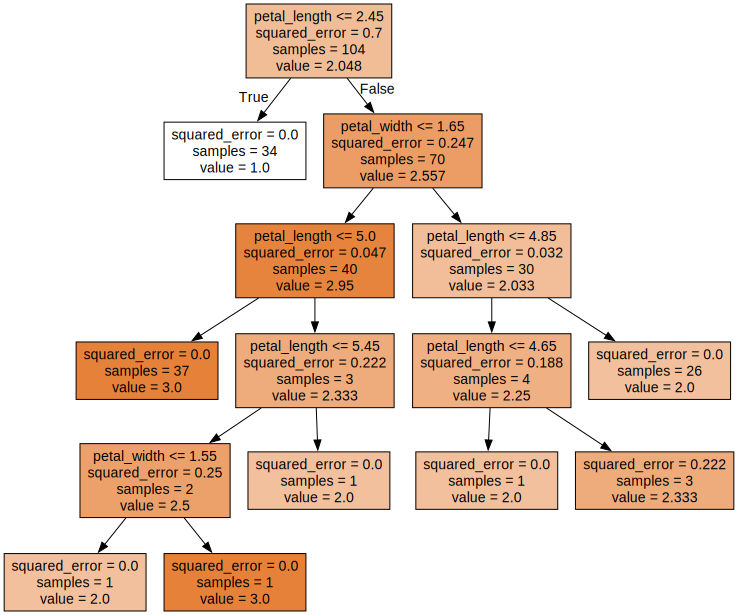

In [122]:
# vamos vizualizar essa arvore no graphviz

import graphviz
# DOT data
dot_data = tree.export_graphviz(regr2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [123]:
# caminho ccp
path = regr2.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00080128, 0.00208333, 0.00320513, 0.01185897,
        0.13850733, 0.53354026]),
 'impurities': array([0.00641026, 0.00721154, 0.00929487, 0.01570513, 0.0275641 ,
        0.16607143, 0.69961169])}

Text(0, 0.5, 'Impureza total das folhas')

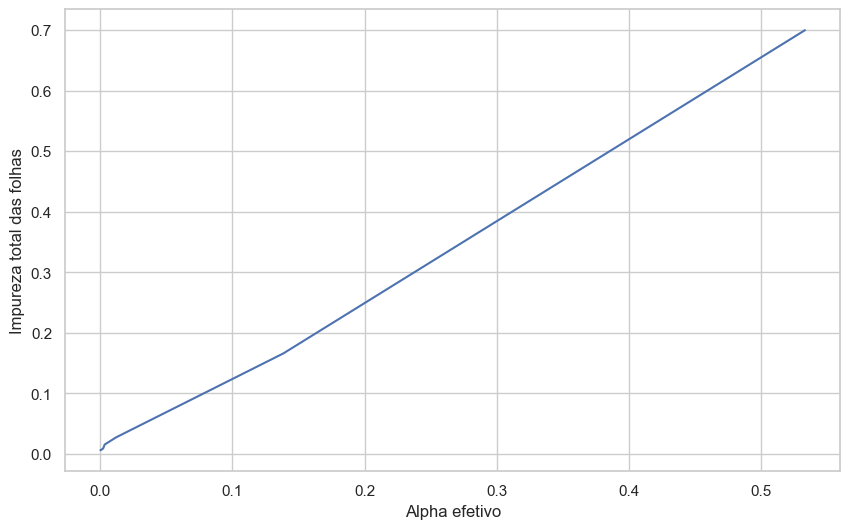

In [124]:
# vizualizando o ccp
ccp_alphas,impurities = path.ccp_alphas,path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [125]:
# treinando uma arvore com os valores obtidos e guardando em uma lista

clfs = []

for ccp_alpha in ccp_alphas:
    clf = clf = DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

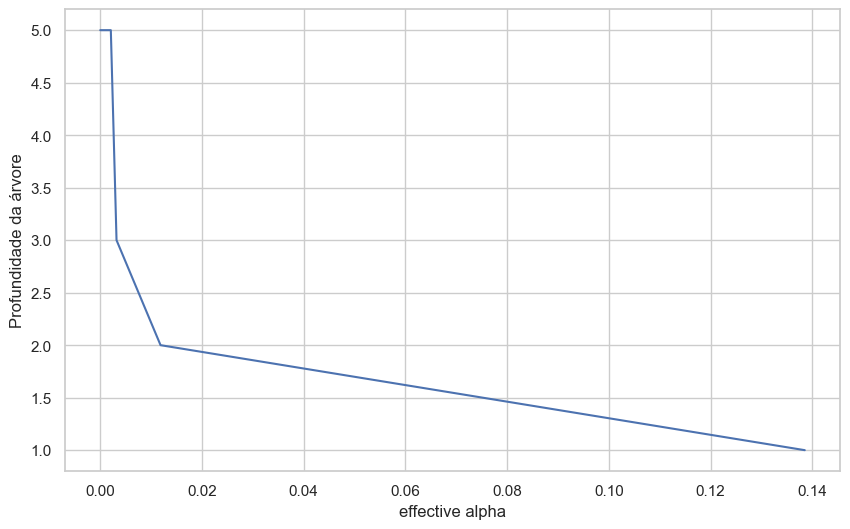

In [126]:
# vizualizando

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [127]:
# para cada arvore, usar o mse
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

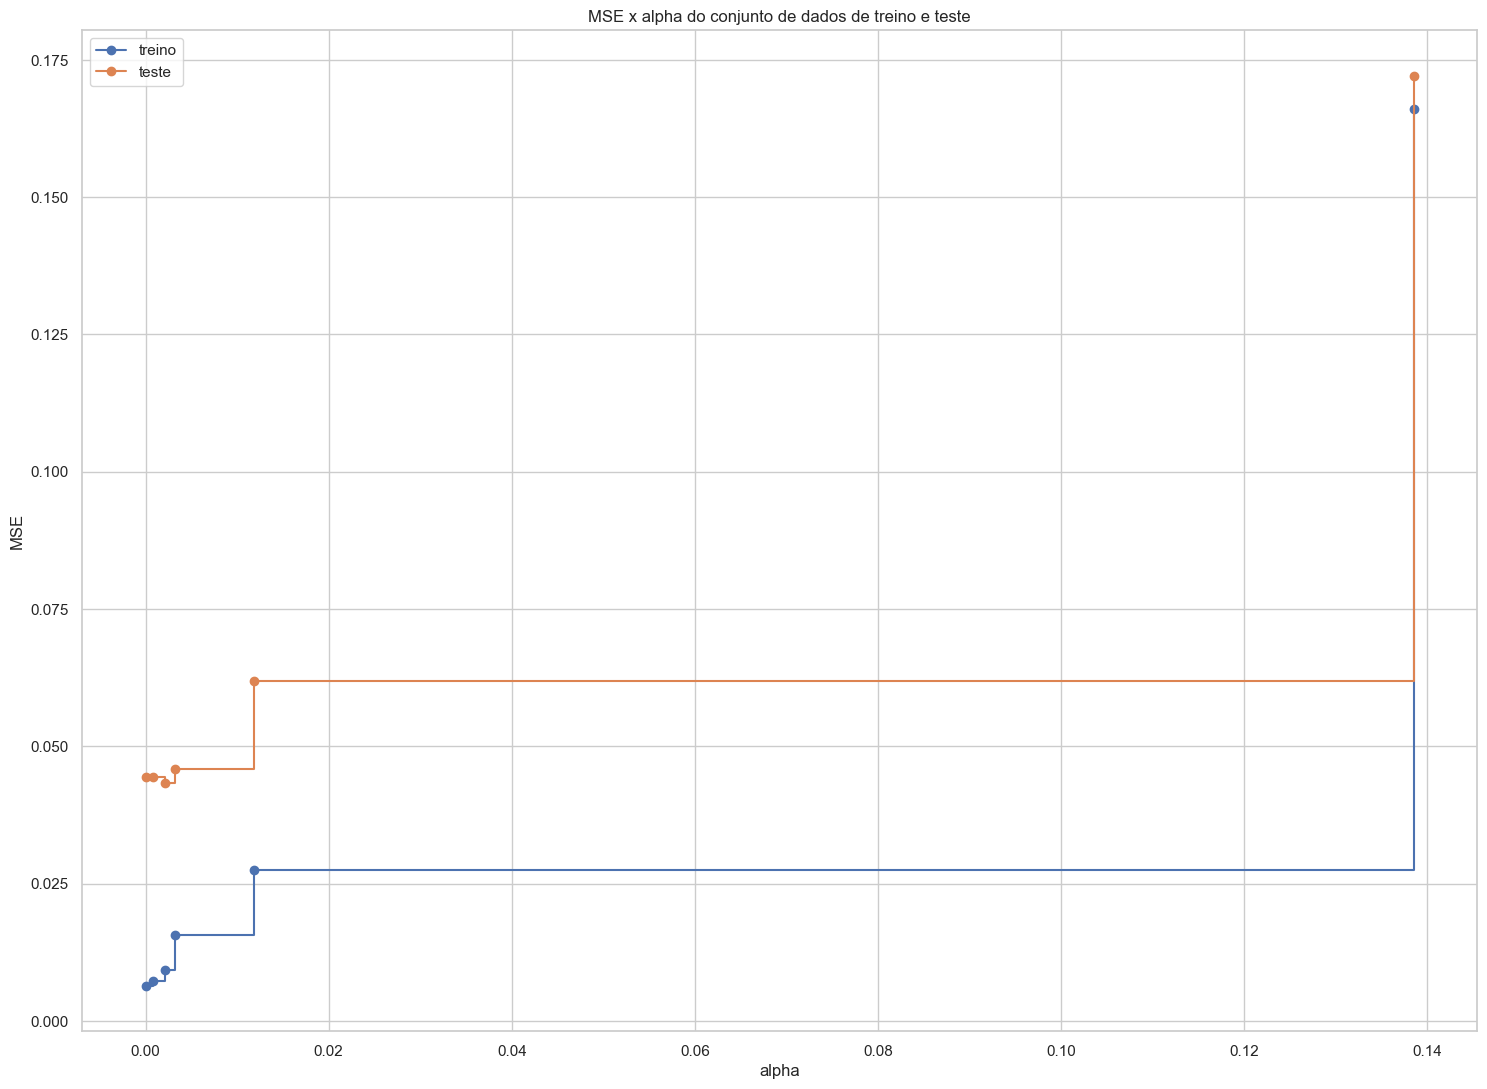

In [128]:
# montando gráfico

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [131]:
arvore_final = DecisionTreeRegressor(random_state=0,ccp_alpha=0.13)
arvore_final.fit(X_train,y_train)


print(f'profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de teste: {arvore_final.score(X_test,y_test)}')
print(f'MSE na base de teste: {mean_squared_error(y_test,arvore_final.predict(X_test))}')

profundidade: 2
R-quadrado na base de teste: 0.8947899159663866
MSE na base de teste: 0.06182716049382717


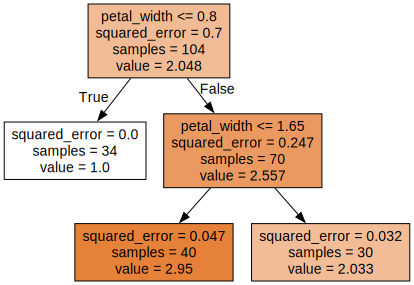

In [132]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(arvore_final, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

 se a petal_width for menor que 0.8, provavelmente a specie é 1 = setosa

 se for menor que 1.65, provavelmente é 3 = versicolor
 
 se não 2 = virginica